# Logistic Regression with UCI Adult Income


In [ ]:
import numpy as np  
import pandas as pd 

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [144]:
train = pd.read_csv('adult.csv')
train.head(50)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Dealing with missing data

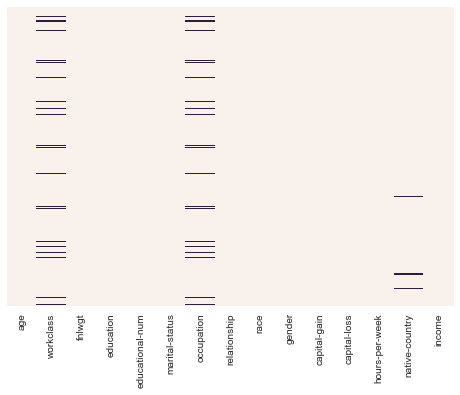

In [145]:
train.replace('?',np.nan, inplace = True)
train.head(50)
sns.heatmap(train.isnull(),yticklabels= False, cbar= False)


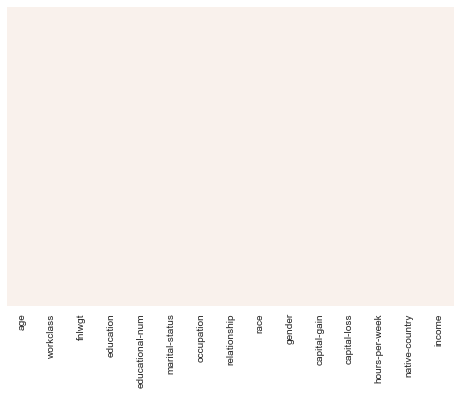

In [146]:
#since there are very little missing values, just drop the rows with N/A values 

train.dropna(axis=0, inplace = True)
sns.heatmap(train.isnull(),yticklabels= False, cbar= False)


# Encode target into 1 or 0

In [147]:
#changing the label of target data into 0 or 1 
target = (train.income == '>50K').astype(int)
trainC = train.drop('income',axis = 1)

df = pd.concat([trainC,target],axis = 1)
#trainC
#sns.pairplot(train)
#trainC.drop('income',axis = 1)


In [159]:
df.head(5)
#there are too many features here, lets pick out the features that are more important 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,public,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,unmarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


# Combining Workclass 

array(['Private', 'public', 'self-employed', 'unemployed'], dtype=object)

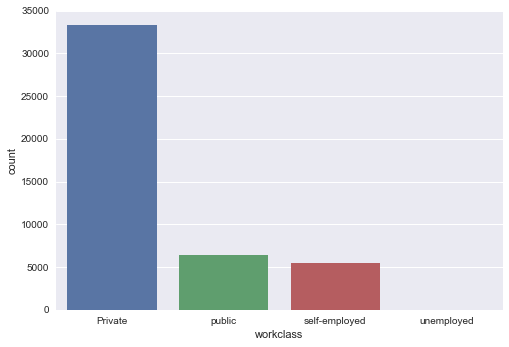

In [202]:
sns.set(style="darkgrid")
sns.countplot(x = 'workclass', data = df)
df.workclass.unique()

In [150]:
df.workclass.replace(['Without-pay'], 'unemployed',inplace = True)
df.workclass.replace(['Local-gov','Federal-gov','State-gov'], 'public',inplace = True)
df.workclass.replace(['Self-emp-not-inc','Self-emp-inc'], 'self-employed',inplace = True)
df.workclass.unique()

array(['Private', 'public', 'self-employed', 'unemployed'], dtype=object)

# Combining Marital Status 

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

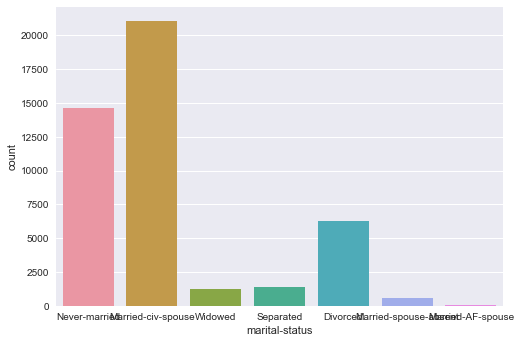

In [153]:

sns.countplot(x = 'marital-status', data = df)
df['marital-status'].unique()

In [155]:
df['marital-status'].replace(['Never-married', 'Widowed','Separated','Divorced'], 'unmarried',inplace = True)
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse','Married-spouse-absent'], 'married',inplace = True)

df['marital-status'].unique()

array(['unmarried', 'married'], dtype=object)

# Combining race

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

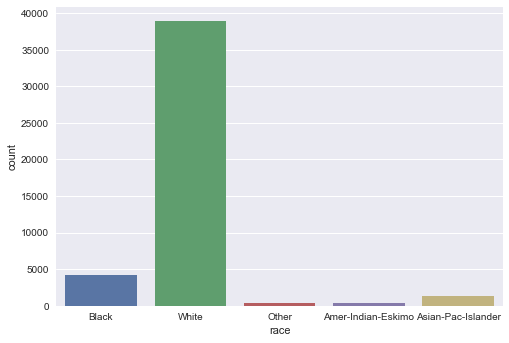

In [156]:
sns.countplot(x = 'race', data = df)
df['race'].unique()

In [158]:
df.race.replace(['Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], 'others',inplace = True)
df['race'].unique()

array(['Black', 'White', 'others'], dtype=object)

# Combining country

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China',
       'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador',
       'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago',
       'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands'], dtype=object)

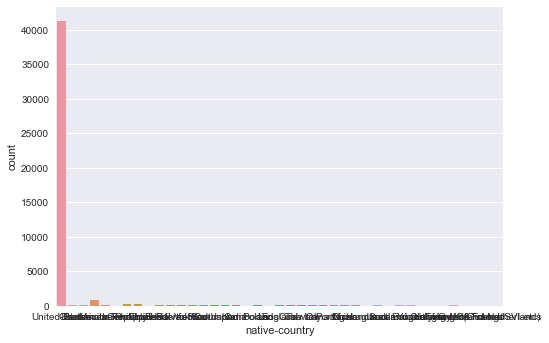

In [162]:

sns.countplot(x = 'native-country', data = df)
df['native-country'].unique()

In [165]:
df['native-country'].replace(["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                   "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                   "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                   "United-States"], 'north america',inplace = True)
df['native-country'].replace(["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          "Philippines", "Taiwan", "Thailand", "Vietnam"], 'asia',inplace = True)
df['native-country'].replace(["Columbia", "Ecuador", "Peru"], 'south america',inplace = True)
df['native-country'].replace(["England", "France", "Germany", "Greece", "Holand-Netherlands",
            "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
            "Yugoslavia"], 'europe',inplace = True)
df['native-country'].unique()

array(['north america', 'south america', 'europe', 'asia', 'South'], dtype=object)

# Selecting the features

In [167]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [169]:
df_cleaned = df[['age', 'workclass','educational-num','marital-status', 'race', 'gender','capital-gain', 
        'capital-loss', 'hours-per-week', 'native-country','income']]

In [171]:
df_cleaned.head() 

,age,workclass,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,unmarried,Black,Male,0,0,40,north america,0
1,38,Private,9,married,White,Male,0,0,50,north america,0
2,28,public,12,married,White,Male,0,0,40,north america,1
3,44,Private,10,married,Black,Male,7688,0,40,north america,1
5,34,Private,6,unmarried,White,Male,0,0,30,north america,0


In [175]:
X = df_cleaned.drop('income',axis =1 )
X.head()

,age,workclass,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,7,unmarried,Black,Male,0,0,40,north america
1,38,Private,9,married,White,Male,0,0,50,north america
2,28,public,12,married,White,Male,0,0,40,north america
3,44,Private,10,married,Black,Male,7688,0,40,north america
5,34,Private,6,unmarried,White,Male,0,0,30,north america


In [185]:
D_X = pd.get_dummies(X)

X1 = D_X.drop(['gender_Female','marital-status_unmarried','race_others'], axis =1)
X1.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_public,workclass_self-employed,workclass_unemployed,marital-status_married,race_Black,race_White,gender_Male,native-country_South,native-country_asia,native-country_europe,native-country_north america,native-country_south america
0,25,7,0,0,40,1,0,0,0,0,1,0,1,0,0,0,1,0
1,38,9,0,0,50,1,0,0,0,1,0,1,1,0,0,0,1,0
2,28,12,0,0,40,0,1,0,0,1,0,1,1,0,0,0,1,0
3,44,10,7688,0,40,1,0,0,0,1,1,0,1,0,0,0,1,0
5,34,6,0,0,30,1,0,0,0,0,0,1,1,0,0,0,1,0


In [179]:
#D_X.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Private', 'workclass_public',
       'workclass_self-employed', 'workclass_unemployed',
       'marital-status_married', 'marital-status_unmarried', 'race_Black',
       'race_White', 'race_others', 'gender_Female', 'gender_Male',
       'native-country_South', 'native-country_asia', 'native-country_europe',
       'native-country_north america', 'native-country_south america'],
      dtype='object')

# Logistic Regresssion 

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                   df_cleaned.income, test_size=0.30, 
                                                    random_state=101)

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
predictions = logmodel.predict(X_test)

In [200]:
from sklearn.metrics import classification_report

In [201]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.93      0.89     10131
          1       0.73      0.55      0.63      3436

avg / total       0.83      0.83      0.83     13567

